<a href="https://colab.research.google.com/github/IsaacLee215/Project-1/blob/main/Code_Walkthrough_Week_1_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Lab Session: Time Series Data
## From Prices to Returns

In this week's session, we will introduce content for our first week by looking at the very basics of returns, compounding, and annualizing for a sequence. Our goal in developing these basic tools is to reinforce a couple of concepts introduced in class today, bust some of the rust for those who have not worked in python for a little while, and introduce a collection of the packages that we will be using this term. To start, we will create two times series for imaginary stocks with ticker signs ABC and XYZ:

In [ ]:
prices_abc = [8.70, 8.91, 8.71, 8.69, 8.82, 8.92, 9.00]
prices_xyz = [6.50, 6.52, 6.57, 6.67, 6.63, 6.68, 6.69]

Returns, given from time $t$ until time $t+1$ can be represented by the formula:

$$
R_{t,t+1}=\frac{P_{t+1}-P_t}{P_t}
$$

Alternately, if we want to simplify the numerator, we can see that this becomes

$$
R_{t,t+1}=\frac{P_{t+1}}{P_t}-1
$$
**Reminder:** What we have created above is a set of Python lists. These do not operate like vectors operate in other languages, so we need to first transform them into numpy arrays, which *do* behave like vectors.

In [ ]:
import numpy as np
prices_abc = np.array(prices_abc)
prices_abc

array([8.7 , 8.91, 8.71, 8.69, 8.82, 8.92, 9.  ])

To generate returns, we want to divide every entry by the price from the prior day like so:

In [ ]:
returns_abc = prices_abc[1:] / prices_abc[:-1] - 1
returns_abc

array([ 0.02413793, -0.02244669, -0.00229621,  0.01495972,  0.01133787,
        0.00896861])

For the purposes of today's lab, we are going to be quoting these returns in terms of daily amounts, although it is equally as feasible to quote them in terms of hours, minutes, or even seconds. The **granularity** of our data is driven by what type of trading strategy we are considering executing. For instance, we might be interested in **High Frequency Trading**, which involves capitalizing on small market movements, or in **long-term portfolio construction** where we hold onto several proven stocks for a long period of time, reaping the benefits of their periodic returns.

For the purposes of today's lab, we'll now shift our focus towards pandas to further remind ourselves of the different data types which exist in python:

In [ ]:
import pandas as pd
prices = pd.DataFrame({"ABC" : prices_abc, "XYZ" : prices_xyz})

In [ ]:
prices

,ABC,XYZ
0,8.70,6.50
1,8.91,6.52
2,8.71,6.57
3,8.69,6.67
4,8.82,6.63
5,8.92,6.68
6,9.00,6.69


**NOTE**: Using the code that we created above, we'll run into an issue because Pandas DataFrames will default to aligning the row indices:

In [ ]:
prices.iloc[1:]/prices.iloc[:-1] - 1

,ABC,XYZ
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,NaN,NaN


To fix this, we can extract the values from the Pandas DataFrame column be referencing them directly to return a numpy array, so that we override the DataFrame behavior and don't worry about aligning the rows:

In [ ]:
returns = prices.iloc[1:].values/prices.iloc[:-1] - 1

If we want to do this in a cleaner way, we can use the `shift()` method on the array, which realigns the indices. Then, since we want to get the 2nd row divided by the first row, the 3rd row by the 2nd, and so on, we can use `shift(1)`for this single offset dividing the unshifted values. This will yield an identical return to the columns shown above.

In [ ]:
returns = prices/prices.shift(1) -1
returns

,ABC,XYZ
0,NaN,NaN
1,0.024138,0.003077
2,-0.022447,0.007669
3,-0.002296,0.015221
4,0.014960,-0.005997
5,0.011338,0.007541
6,0.008969,0.001497


In addition, we can create and examine some statistics relevant to portfolio selection. Next week, we'll get into different ways to evaluate and conceptualize the trade-offs between returns and volatility.

In [ ]:
returns.mean()

,0
ABC,0.005777
XYZ,0.004835


In [ ]:
returns.std()

,0
ABC,0.016275
XYZ,0.007138


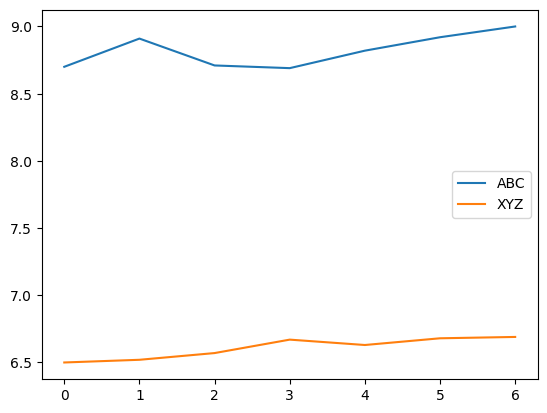

In [ ]:
prices.plot()
plt.show()

What we've created above is the daily percent change from the last day's data. But what about if we're interested in total change from $t=0$? To get this value, we need to employ two new commands: `pct_change()`, which will give us the percent changes from one entry to the next, and `cumprod()`, which gives the cumulative product up to a row in a DataFrame.

In [ ]:
(returns+1).cumprod()

,ABC,XYZ
0,1.024138,1.003077
1,1.001149,1.010769
2,0.998851,1.026154
3,1.013793,1.020000
4,1.025287,1.027692
5,1.034483,1.029231


## Data Access from Yahoo Finance

One of the accessible packages we can use in python is `yfinance`, which provides us with up-to-date information on securities. In the below code, we will demonstrate how to use this package. First, if your local instance of Google Colab does not have the package installed already, uncomment and run the below line (this should take <1 minute)

In [ ]:
pip install yfinance

In the below code, we will fetch the data of multiple stocks which is automatically stored in a DataFrame object. We pass as an argument a list of **tickers**, which are the short-hand abbreviations associated with publicly traded companies. In this case, we are accessing data on Apple, Walmart, IBM, Micron, Boeing, and American Express. We then give this argument a first date, an end date, and the interval for which we want to grab the information. What we've created below is a set of monthly closing prices for the year of 2021:

In [ ]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list, start='2021-01-01', end='2022-01-01', interval = '1mo')['Close']

# Print first 5 rows of the data
data.head(12)

[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AXP,BA,IBM,MU,WMT
Date,,,,,,
2021-01-01,128.727219,109.848808,194.190002,93.721344,76.518456,43.945049
2021-02-01,118.289368,128.249176,212.009995,93.579681,89.481697,40.638767
2021-03-01,119.335594,134.108856,254.720001,106.256371,86.236008,42.487400
2021-04-01,128.431076,145.838593,234.309998,113.129623,84.143890,43.946339
2021-05-01,121.738930,152.286469,247.020004,114.612740,82.257080,44.612236
2021-06-01,134.031693,157.136688,239.559998,118.191193,83.078293,44.468948
2021-07-01,142.741379,162.177078,226.479996,113.651909,75.843895,44.951416
2021-08-01,148.583755,158.242752,219.500000,113.151993,72.050713,46.701538
2021-09-01,138.682037,159.739731,219.940002,113.304756,69.391586,44.113533


Next, let's examine how to create a visualization of this data in terms of cumulative returns. Using the code we developed in the last section, let's now take the data we extracted and plot the lines in parallel for each ticker

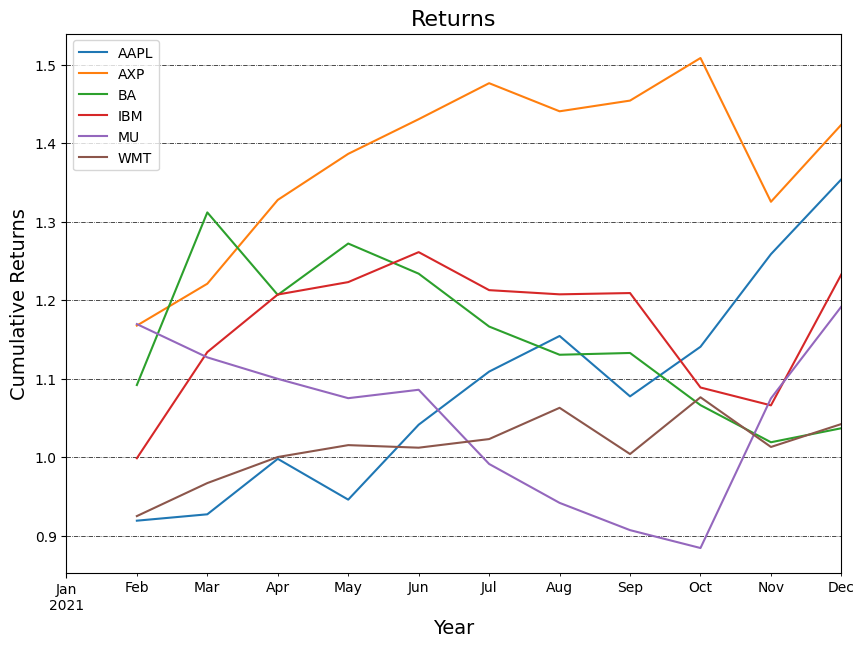

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

##  **Chat Waterfall: What are some noticeable trends in 2021?**

To access a list of all stock tickers in the S&P 500, let's grab them from a Wikipedia page and create a dataframe like so:

In [ ]:
# Import packages
import yfinance as yf
import pandas as pd

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


**Note**: We will use this dataframe to look up companies in the custom problems at the end of today's lab session!

## Compounding Returns

We now have a series of data that give us the 12 monthly returns from 2021, which we had saved in the `data` object. From that, we can produce compounded returns by multiplying the individual period returns, as long as the returns are expressed in the second form introduced above, which is 1 + the rate of return for a given period (in this case, month). Let's remind ourselves of what this data object looks like:

In [ ]:
data.head()

Ticker,AAPL,AXP,BA,IBM,MU,WMT
Date,,,,,,
2021-01-01,128.727219,109.848808,194.190002,93.721344,76.518456,43.945049
2021-02-01,118.289368,128.249176,212.009995,93.579681,89.481697,40.638767
2021-03-01,119.335594,134.108856,254.720001,106.256371,86.236008,42.487400
2021-04-01,128.431076,145.838593,234.309998,113.129623,84.143890,43.946339
2021-05-01,121.738930,152.286469,247.020004,114.612740,82.257080,44.612236


In [ ]:
new_table = data.pct_change()
new_table

Ticker,AAPL,AXP,BA,IBM,MU,WMT
Date,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,-0.081085,0.167506,0.091766,-0.001512,0.169413,-0.075237
2021-03-01,0.008845,0.045690,0.201453,0.135464,-0.036272,0.045489
2021-04-01,0.076218,0.087464,-0.080127,0.064686,-0.024260,0.034338
2021-05-01,-0.052107,0.044212,0.054244,0.013110,-0.022424,0.015153
2021-06-01,0.100976,0.031849,-0.030200,0.031222,0.009983,-0.003212
2021-07-01,0.064982,0.032076,-0.054600,-0.038406,-0.087079,0.010850
2021-08-01,0.040930,-0.024259,-0.030819,-0.004399,-0.050013,0.038934
2021-09-01,-0.066641,0.009460,0.002005,0.001350,-0.036906,-0.055416


To compound the returns, simply add 1 to each return value and multiply them against each other:

In [ ]:
np.prod(new_table+1)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Ticker,
AAPL,1.353931
AXP,1.423596
BA,1.036717
IBM,1.232832
MU,1.191774
WMT,1.042077


In [ ]:
(returns+1).prod()-1

,0
ABC,0.034483
XYZ,0.029231


In [ ]:
(((returns+1).prod()-1)*100).round(2)

,0
ABC,3.45
XYZ,2.92


## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [ ]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [ ]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

# Practice Problems Start Here

## Workflow for breakout session

- Begin by discussing any questions on lecture and code walkthrough
- Give a brief overview of the problem set
- Allow students to code independently for at least 10 min
- Check in with students to answer questions
- Allow students to share their answers
- Repeat independent coding and review

In this breakout session, we are going to extract and visualize our own set of returns from the Pharmaceuticals industry. This type of analysis might be helpful if your team asks you to look at major trends, outliers, and generate narratives across a segment. For the purposes of our analysis, we will be conducting two separate tasks. First, we are asking you to generate a visualization concerning data from March of 2020 for the pharmaceuticals industry. Next, we are asking you to examine the same data on a less granular scale for the year of 2020 as a whole.

We will need to start with cleaning our data, which is the next step we'll examine:

## 1) Identify outliers in the `Founded` column on `tickers`

Now, we will introduce an additional step that you will learn, but is best introduced first by example. Two principles are at play in the code below. First, we are using something called **list comprehension** to execute a command across a series of data. Second, we are using a regular expression substitution to replace any parenthetical information with a blank character to fix the issues identified above:

In [ ]:
import re
tickers.Founded = [re.sub(r"\s*[\(\[].*$", "", x) for x in tickers.Founded]
tickers.Founded = [re.sub(r"/.*", "",x) for x in tickers.Founded]
tickers.Founded

,Founded
0,1902
1,1916
2,1888
3,2013
4,1989
...,...
498,2011
499,1997
500,1969
501,1927


## 2) Convert 'Founded' into a numeric column and replace it in the `tickers` dataframe

## 3) Find the tickers of 5 businesses (your choice which) within the Pharmaceuticals industry which were founded before 2020.

* Hint 1: Use the `tickers` object which we created above, specifically the columns `Symbol`, `GICS Sub-Industry`, and the newly clean `Founded`

In [ ]:
(

TypeError: '<' not supported between instances of 'str' and 'int'

## 4) Using `yfinance`, create and save a dataframe which represents daily  returns from March of 2020 for your selected five tickers

## 5) Visualize these five time series of data for March of 2020 in a plot together

## 6) Create a similar dataframe, extracting monthly returns for 2020, then visualize

## 7) Find the annualized return for a 5% monthly gain

## 8) Last question: Find the annualized return for a 13% quarterly gain